In [73]:
import pandas as pd
import numpy as np
data = pd.read_csv('calihospital.txt', sep='\t')  #load in data
data.head()# check data

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


In [75]:
num_cols = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds'] #Num columns
hospital_data = data[num_cols].dropna() #new DataFrame 7 numerical hospital-level columns
hospital_data = data[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']]

In [77]:
from sklearn.preprocessing import StandardScaler #libraries for numerical operations and PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler() #Standardize the data
scaled_data = scaler.fit_transform(hospital_data) 

In [79]:
from sklearn.decomposition import PCA
pca = PCA()  # create PCA object
pca.fit(hospital_scaled)                  

PCA()

Eigenvalues (variance explained by each component):
[5.72134563e+00 1.07657967e+00 1.91383827e-01 9.31699632e-02
 3.29143500e-02 1.27322677e-03 5.91419821e-22]

Explained Variance Ratio (percentage of variance explained):
[8.03936154e-01 1.51275832e-01 2.68923410e-02 1.30917981e-02
 4.62496721e-03 1.78907742e-04 8.31034878e-23]


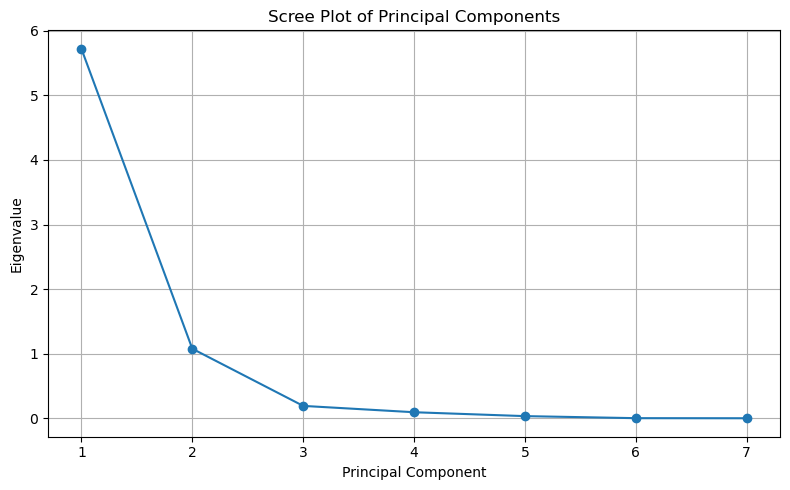

In [81]:
import numpy as np
eigenvalues = pca.explained_variance_ # get eigenvalues for each component
print("Eigenvalues (variance explained by each component):")
print(eigenvalues)

explained_variance_ratio = pca.explained_variance_ratio_  #variance ratio (as %)
print("\nExplained Variance Ratio (percentage of variance explained):")
print(explained_variance_ratio)


#create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(1, len(eigenvalues) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

For the eigenvalues, I chose to retain the first two components. Both have eigenvalues greater than 1, satisfying the Kaiser Criterion. Together, they account for approximately 95.5% of the total variance (80.4% from PC1 and 15.1% from PC2). The scree plot, a visual representation of the eigenvalues, shows an apparent elbow after the second component, indicating diminishing returns beyond this point. Therefore, retaining two components is sufficient for dimensionality reduction without significant information loss.

In [83]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42) #KMeans with 3 clusters
data['Cluster'] = kmeans.fit_predict(hospital_scaled)  # add cluster labels back
data[['Name', 'Cluster']].head() #check clusters

,Name,Cluster
0,Mammoth Hospital,0
1,Victor Valley Community Hospital,0
2,Pioneers Memorial Hospital,0
3,Ridgecrest Regional Hospital,0
4,Barstow Community Hospital,0


In [85]:
print("Confusion Matrix: Teaching") # teaching/cluster
print(pd.crosstab(data['Cluster'], data['Teaching']))

Confusion Matrix: Teaching
Teaching  Small/Rural  Teaching
Cluster                        
0                  44         2
1                   0         3
2                   0        12


In [87]:
print("\nConfusion Matrix: TypeControl") # typecontrol/cluster
print(pd.crosstab(data['Cluster'], data['TypeControl']))


Confusion Matrix: TypeControl
TypeControl  City/County  District  Investor  Non Profit
Cluster                                                 
0                      2        14         3          27
1                      0         0         0           3
2                      5         0         0           7


In [89]:
print("\nConfusion Matrix: DonorType") # donortype/cluster
print(pd.crosstab(data['Cluster'], data['DonorType']))


Confusion Matrix: DonorType
DonorType  Alumni  Charity
Cluster                   
0               2       44
1               3        0
2              12        0


Looking at the confusion matrices, it’s interesting that the Teaching variable aligns most clearly with the clustering results. Cluster 0 is made up almost entirely of Small/Rural hospitals, while Cluster 2 contains mostly Teaching hospitals, showing a clear and confident separation. DonorType also shows strong grouping, with one cluster dominated by Charity donors and the others by Alumni, but it doesn't separate all three clusters as distinctly. TypeControl, on the other hand, appears more mixed across clusters, suggesting it’s not as strong a fit. Overall, Teaching seems to be the best grouping variable, and it’s pretty neat to see how well the unsupervised learning matches up with this known category.